# CBM track data decoder
This notebook illustrates how to check that a raw stream decoder has been correctly implemented.

You might want to replace the embedded raw data block with one you decoded from a different title and test the process.

## Initialization

In [1]:
# Check versions
import sys
import matplotlib

print("Python is:", sys.version)
print("Matplotlib is:", matplotlib.__version__)

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

Python is: 3.7.8 | packaged by conda-forge | (default, Jul 23 2020, 03:54:19) 
[GCC 7.5.0]
Matplotlib is: 3.3.3


## KryoFlux stream data
We shall be working with partial data from track 1 of "Skate or Die", decoded from a KryoFlux raw stream. Only picking a block of the data allows us to speed up the histogram generation and bit decoding process, without loss of generality.

In [2]:
y = np.array([
0x80,0xc1,0x80,0xc1,0x80,0x80,0xbf,0x42,0x42,0xbd,0x43,0x7f,0xc0,0x81,0x7f,0x81,
0xc0,0xc0,0x80,0xc2,0x7e,0x82,0xbf,0x81,0xbe,0x45,0x7e,0x81,0xc0,0x80,0xbf,0x83,
0xbf,0x82,0xbf,0x81,0xc0,0x81,0xbf,0x82,0xbe,0x42,0x41,0xc1,0x7f,0xbf,0x41,0x43,
0xbe,0x82,0xbe,0x83,0xbe,0x82,0x7e,0x42,0x40,0x80,0x80,0xc1,0x80,0x81,0xbf,0x41,
0x40,0x41,0x41,0xbe,0x40,0x44,0xbb,0x45,0x7d,0x83,0x6f,0x1c,0x74,0x80,0x80,0x82,
0x00,0x7f,0x80,0x82,0x7f,0x81,0x7f,0x83,0x7f,0x80,0x80,0x81,0x7f,0x82,0x7f,0x81,
0x7f,0x81,0x80,0x80,0x80,0x81,0x7f,0x82,0x7e,0x82,0x7e,0x83,0x7e,0x82,0x80,0x7e,
0x42,0x40,0x3f,0x41,0x3f,0x42,0x3f,0x40,0x40,0x40,0x40,0x41,0x3f,0x41,0x40,0x3f,
0x41,0x41,0x3e,0x41,0x40,0x41,0x3f,0x40,0x41,0x40,0x3f,0x41,0x40,0x40,0x40,0x41,
0x3f,0x40,0x40,0x40,0x40,0x41,0x40,0x41,0x7e,0x81,0xbf,0xc2,0x7f,0x7f,0x41,0x42,
0x7c,0x43,0x40,0x80,0x7e,0x42,0x40,0xc1,0xbe,0x82,0xbf,0x7f,0x42,0x7f,0x41,0x41,
0xbe,0x80,0x42,0x7e,0x40,0x43,0xbc,0x43,0x3e,0x43,0x7e,0x80,0x80,0x81,0x7e,0x81,
0x80,0x81,0x7f,0x81,0x7f,0x80,0x80,0x81,0x7f,0x80,0x80,0x80,0x81,0x7f,0x7f,0x81,
0x7e,0x82,0x80,0x81,0x7f,0x81,0x80,0x80,0x7e,0x81,0x80,0x80,0x7f,0x81,0x7f,0x81,
0x7f,0x81,0x7e,0x82,0x7e,0x81,0x80,0x81,0x7f,0x81,0x7f,0x7e,0x41,0x41,0x40,0x41,
0x3f,0x40,0x3f,0x41,0x40,0x40,0x3f,0x40,0x41,0x40,0x3f,0x41,0x3f,0x41,0x40,0x3f,
0x40,0x40,0x40,0x41,0x3f,0x41,0x3f,0x41,0x40,0x3f,0x3f,0x41,0x40,0x41,0x3e,0x41,
0x40,0x41,0x3f,0x41,0x7e,0x81,0x7f,0x7f,0x41,0x43,0x7e,0x80,0xbf,0x81,0xbf,0x81,
0xbf,0x81,0xbf,0x81,0xbe,0x81,0x7d,0x44,0x3e,0x42,0xbd,0x81,0xc0,0x82,0xbe,0x81,
0xbd,0x82,0xbf,0x80,0xbf,0x41,0x42,0xbe,0x7f,0xc2,0x7e,0xc2,0x7f,0xc0,0x80,0xc0,
0x80,0xc0,0x7f,0xc0,0x80,0xc0,0x7d,0x44,0x7d,0x80,0xbe,0x44,0x80,0x7f,0x3f,0x42,
0xbd,0x81,0x80,0x7f,0x43,0xbe,0x81,0xc0,0x7e,0xc0,0x40,0x41,0x7e,0xc0,0x43,0x7f,
0x7f,0xc0,0x7f,0x81,0x7d,0x44,0xbd,0x82,0x7f,0x7f,0x41,0xbd,0x43,0x7f,0x7f,0x80,
0x41,0x80,0xbd,0x81,0x80,0xc1,0x7f,0x7e,0x44,0xbd,0x80,0xc0,0x7f,0x81,0xc0,0x7f,
0xbe,0x42,0x41,0xbf,0x7f,0xc0,0x80,0xc0,0x7f,0xc0,0x80,0xc0,0x7f,0xc1,0x7e,0xc1,
0x7d,0x44,0x7e,0x81,0xbf,0x80,0xbf,0x81,0xbf,0x7e,0x40,0x44,0xba,0x44,0x7f,0x80,
0xc0,0x7f,0xbf,0x81,0xbf,0x80,0xbf,0x7f,0x43,0x7e,0xbf,0x80,0x80,0xc0,0x7f,0xc0,
0x80,0xc0,0x7d,0x43,0x7e,0x7f,0x43,0x7e,0xc0,0x80,0x7f,0x81,0xbd,0x44,0x7e,0x80,
0x7f,0x7f,0x43,0xbf,0x7f,0x81,0xbd,0x44,0x7d,0x81,0xbf,0x81,0x7e,0x81,0x7f,0x81,
0xbe,0x82,0xbe,0x81,0x80,0xc0,0x80,0x80,0x7e,0x43,0xbd,0x82,0xbf,0x80,0xc0,0x7e,
0x42,0x80,0xbf,0x81,0x7f,0xc0,0x7e,0x44,0x7d,0xc2,0x7e,0x81,0xbf,0x82,0xbd,0x41,
0x42,0xbe,0x80,0xc0,0x41,0x40,0x40,0x80,0x7d,0x45,0x7e,0x80,0xc0,0x80,0xc0,0x81,
0x7e,0xc3,0xbf,0xc1,0x7f,0x80,0xc0,0x81,0xbf,0x80,0x81,0x7e,0x44,0xbf,0xbf,0x80,
0x80,0xc1,0x80,0xc1,0x7f,0xc1,0x7f,0xc2,0x7f,0xc0,0x81,0xc0,0x7f,0x81,0xbf,0x42,
0x3f,0x41,0x40,0x41,0x7f,0xc1,0xc0,0x80,0xbe,0x82,0xc0,0x7f,0x43,0x7f,0xbf,0x83,
0x7f,0xc1,0x80,0x82,0x7c,0x45,0xbd,0x82,0xbf,0x80,0x80,0x7f,0x43,0xc0,0x7f,0xc2,
0x7f,0xc0,0x81,0xbf,0x80,0xc3,0x7d,0x44,0x7e,0x81,0xc0,0x7f,0x42,0x7e,0x41,0x42,
0xbc,0x44,0x41,0xbf,0x7f,0xc3,0x7f,0xc0,0x7f,0xc2,0x7f,0xbf,0x43,0x80,0x7e,0x82,
0xc0,0x80,0xbf,0x81,0xbf,0x81,0xc1,0x82,0x7e,0xc2,0x80,0x7f,0x42,0xbe,0xc1,0x81,
0x7f,0xc1,0x80,0xbf,0x42,0x41,0xbe,0x82,0xbe,0x83,0xbe,0x81,0xc1,0x81,0xbd,0x44,
0x7c,0x43,0x3f,0x42,0x7d,0x43,0x40,0x81,0xbe,0x81,0xbf,0x82,0xbf,0x81,0xbe,0x82,
0xbf,0x82,0xbf,0x81,0xbe,0x83,0xbe,0x43,0x7c,0x43,0x3f,0x43,0x7f,0x80,0xbe,0x44,
0xbc,0x44,0x7d,0x81,0xc1,0x7e,0x44,0x80,0xbe,0x82,0x7f,0x80,0x7e,0x44,0xbd,0x80,
0x42,0x80,0x80,0x80,0xc0,0xc1,0x80,0x81,0x80,0x81,0x7f,0x7f,0x44,0x7e,0x7d,0x45,
0x7e,0x82,0xbd,0x44,0x7e,0x81,0x80,0xc0,0x80,0xc0,0x7f,0x82,0xbe,0x43,0x7d,0x43,
0x41,0xbf,0x80,0xc0,0x81,0xc0,0x81,0xc0,0x80,0xc0,0x80,0xc2,0x7f,0xc0,0x80,0xc0,
0x42,0x41,0xbf,0x7f,0x43,0x7f,0x7f,0x81,0xc1,0xc1,0x7f,0x7f,0x81,0x82,0x7f,0x7f,
0x43,0x7f,0x7e,0x43,0x7f,0x81,0xbe,0x44,0x7d,0x80,0x81,0xc0,0x81,0xc0,0x80,0x81,
0xbd,0x45,0x7e,0x81,0x7f,0xbf,0x42,0x7f,0x81,0xc1,0x81,0xc0,0x7f,0xc1,0x81,0xbf,
0x81,0xc1,0x7f,0xc0,0x80,0xc2,0x7d,0x44,0x7e,0xc1,0x7e,0x44,0x7e,0x81,0x7f,0xc1,
0x80,0xc1,0x7f,0xc2,0x7e,0xc2,0x7e,0xc2,0x7f,0xc1,0x80,0xbf,0x40,0x43,0xbd,0xc2,
0x7f,0x80,0xc1,0x80,0xc0,0x80,0xc0,0x7e,0x44,0x7e,0x80,0xbf,0x80,0xc2,0x7f,0x80,
0xc0,0xc0,0x80,0xc0,0x81,0xbe,0x41,0x42,0xbd,0x81,0xbf,0x82,0xbe,0x82,0xbf,0x81,
0xbf,0x80,0x7f,0xc2,0xbe,0xbf,0x42,0xc0,0xbe,0x82,0xbd,0x41,0x42,0xbf,0x7e,0x42,
0x3f,0x41,0x3e,0x43,0x7d,0xc1,0x80,0xc1,0xbe,0x7e,0x44,0x7f,0xbf,0x80,0x7f,0xc1,
0x7f,0xc1,0x7f,0xc0,0x80,0xbf,0x80,0xc1,0x7e,0x80,0x41,0x42,0x7d,0x81,0x80,0xc0,
0x80,0xc1,0x7e,0xc1,0x7f,0xbf,0x40,0x43,0xbd,0x7f,0x43,0x80,0x7e,0x80,0xc0,0xc2,
0x7f,0x80,0x7f,0x81,0x7f,0x7f,0x42,0x80,0x7c,0x44,0x7e,0x81,0x7f,0x81,0x7f,0x7f,
0x42,0x43,0xbd,0x81,0xbe,0x81,0xc0,0x81,0xc0,0x81,0xbe,0x82,0xbe,0x81,0x80,0x7f,
0x42,0xbf,0x7f,0xc1,0x80,0xc1,0x7f,0xc1,0x7f,0xc2,0x7e,0xbf,0x41,0x44,0xbd,0xc0,
0x81,0x81,0xbe,0x82,0xbf,0x82,0xbe,0x82,0xbf,0x82,0xbe,0x82,0xbf,0x81,0xbd,0x46,
0x7e,0x81,0x7f,0xc2,0x7e,0xc1,0x7f,0x82,0x7d,0x44,0xbf,0xc2,0x80,0x81,0xbf,0x81,
0xbe,0x82,0xbf,0x82,0xbf,0x82,0xbf,0x81,0xbe,0x80,0x44,0x7e,0xc0,0x7f,0x42,0x43,
0xbd,0x82,0xbe,0xbf,0x43,0xbe,0x43,0x7e,0x43,0x7f,0x7e,0x42,0x41,0xbf,0x40,0x42,
0xbe,0x81,0xc1,0x81,0xbf,0x80,0xc0,0x81,0xbf,0xc1,0x7f,0x82,0xbf,0x81,0xbf,0x82,
0xbf,0x81,0xbf,0x81,0x7f,0xc0,0x42,0x41,0x7c,0x44,0xbf,0xc1,0x7f,0x80,0xc0,0x81,
0xbe,0x82,0xbf,0x82,0xbe,0x82,0xbe,0x81,0x42,0x80,0xbe,0x82,0x7e,0xc2,0x7f,0xc1,
0x7f,0xc2,0x7e,0xc1,0x7f,0xc1,0x7f,0xc2,0xbe,0x81,0x80,0xc1,0x7e,0xc0,0x81,0xc0,
0x80,0xc1,0x7e,0xc0,0x80,0xc1,0xbf,0x81,0x80,0xbf,0x80,0xc1,0x7f,0xc0,0x7f,0xc0,
0x41,0x41,0xbe,0xc1,0x7f,0x81,0xbe,0x44,0x7d,0x7e,0x43,0x7f,0x7e,0x42,0x41,0xbf,
0x7f,0xbf,0x42,0x80,0x80,0x80,0x7f,0x7e,0x43,0xc0,0x7e,0xc2,0x7c,0x42,0x41,0x40,
0x40,0x80,0x7f,0x41,0x3f,0x42,0x7e,0x82,0xbf,0x80,0xbe,0xc1,0x81,0x80,0xbe,0x82,
0xbf,0x81,0xbd,0x42,0x41,0xbf,0x81,0xbe,0x80,0xc2,0x7f,0xc0,0x7f,0xc1,0x7f,0x81,
0x7d,0x44,0xbf,0x7f,0x80,0xc1,0xbc,0x46,0x7d,0x81,0x7f,0xbe,0x42,0x42,0xbd,0x81,
0xbf,0x81,0xbf,0x82,0xbe,0x7f,0x43,0x7f,0x80,0xc0,0x7f,0xc0,0x80,0xc0,0x80,0xc0,
0xc0,0x81,0x7e,0xc1,0x80,0xbf,0x80,0xc1,0x7e,0xc1,0x7e,0x43,0x7f,0xc0,0x7e,0x81,
0xc0,0x80,0xbf,0x7f,0x41,0x41,0x40,0x40,0x41,0xbe,0x80,0xc1,0x80,0xbf,0x80,0xc0,
0x7e,0xc0,0x80,0xc0,0x80,0xc0,0xbe,0x82,0x80,0xbf,0x80,0xbf,0x7f,0x81,0x7f,0x80,
0x7f,0x43,0x7e,0x7f,0x7f,0xc1,0x7f,0xc0,0x80,0xc0,0x80,0xbf,0x80,0xbf,0x80,0xbf,
0x7f,0xc1,0x7f,0xbf,0x80,0xbe,0x81,0xc1,0x7f,0xbf,0x7f,0xc0,0x80,0xbf,0x7e,0xc2,
0x7e,0xc1,0x7f,0xbf,0x7f,0xc1,0x7f,0xbf,0x7f,0xc0,0x7f,0xbf,0x80,0xbf,0x80,0xbf,
0x80,0xc0,0x7e,0xc0,0x7f,0xc0,0x7f,0xbf,0x7f,0xc0,0x80,0xc0,0x80,0xbf,0x7e,0xc1,
0x7f,0xc0,0x7e,0xc0,0x80,0xbf,0x7f,0xc0,0x7e,0xc1,0x7e,0xc0,0x80,0xbf,0x7f,0xc0,
0x7f,0xc0,0x80,0xbf,0x7e,0xc1,0x7f,0xc1,0x7e,0xbe,0x81,0xc0,0x7e,0xc0,0x80,0xbf,
0x7e,0xc2,0x7e,0xc0,0x7f,0xc0,0x7f,0xc0,0x7f,0xbe,0x80,0xc0,0x80,0xc0,0x7e,0xc0,
0x80,0xc0,0x7e,0xbf,0x81,0xbf,0x7f,0xc0,0x7f,0xc0,0x80,0xbf,0x7f,0xc0,0x7f,0xc0,
0x7f,0xc1,0x7e,0xc0,0x80,0xbf,0x80,0xc0,0x7f,0xbf,0x80,0xbf,0x80,0xc1,0x7d,0xc1,
0x7f,0xc1,0x7e,0xc1,0x7f,0xbf,0x81,0xc0,0x7f,0xbf,0x7f,0xc2,0x7d,0xc0,0x80,0xbf,
0x80,0xc1,0x7f,0xc0,0x7e,0xc0,0x80,0xc1,0x7e,0xc1,0x7f,0xbf,0x80,0xc0,0x80,0xbf,
0x80,0xc0,0x7f,0xbf,0x81,0xbf,0x7f,0xc1,0x80,0x80,0x7f,0x81,0x7e,0x81,0xff,0x7f,
0x80,0x81,0xfe,0x82,0x7d,0x81,0x7e,0x81,0x7f,0x80,0x80,0x81,0x7e,0x82,0x7f,0x80,
0x7f,0x81,0x7f,0x80,0x7e,0x82,0x7f,0x80,0x7f,0x81,0x7e,0x81,0x7e,0x81,0x7f,0x80,
0x80,0x7f,0x42,0x40,0x3e,0x42,0x3f,0x3f,0x41,0x40,0x3f,0x41,0x3f,0x40,0x40,0x41,
0x3f,0x41,0x3f,0x41,0x3f,0x40,0x3f,0x40,0x40,0x40,0x40,0x41,0x3e,0x41,0x40,0x40,
0x3f,0x41,0x40,0x40,0x3f,0x41,0x3e,0x41,0x40,0x42,0x7e,0x80,0xc0,0xbf,0x80,0x7f,
])

## Histogram
We generate a histogram in order to determine the thresholds corresponding to each valley.

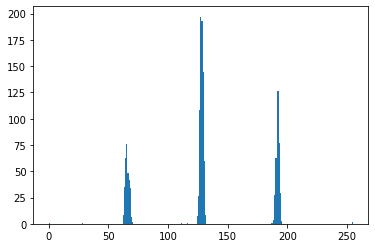

In [3]:
plt.hist(y, bins=range(0, np.amax(y) + 1, 1))
plt.show()

## Filter out short values and decode the rest
We use a simple threshold logic here, based on the above histogram. The various thresholds are likely to be dependent on the zone we are working with.

In [4]:
bitstream = np.empty(0, int)

for v in y:
    if (v > 210):
        bitstream = np.append(bitstream, [1,0,0,0]) # This is an edge case only
    elif (v > 160):
        bitstream = np.append(bitstream, [1,0,0])
    elif (v > 80):
        bitstream = np.append(bitstream, [1,0])
    elif (v > 50):
        bitstream = np.append(bitstream, [1])

What follows is the bitstream grouped in bytes. It clearly shows block-sync sequences that we can use to byte-align the bitstream, so that we will also be working with GCR values.

In [5]:
"".join(map(lambda b: format(b, "02x"), np.packbits(bitstream)))

'a52a734aa4a54a6a5294a529ca7294aea54f9cd5555555555555555557fffffffffd495dd7252dcb73d5555555555555555555555557fffffffffd575294a52bca5294a7294a5294a5a9ae5594a74d4ab2acd5a54aca54a7294a5294b5294b9a94a52d2a5296b4aa6ab2a6a5552952aca52d2a5a54a729eb529524a94ab254a5294a54fd25296952aca5594a5296a5b9ca5294d5294a54ac9529ca5294dee94a5294a537a99a9695596a92aab5a9aa52a6e5294a5294e5aa4aaad6a6a94a9aa6a5294a529696a94a5294a7254a52d4a5494a7294a52a49929cbf4a4b4a94a5295d5294a72d525556b555ca5294a5594a5294e4a94a5294a6a94ab254a5294a5a5ca4cdae7294a5254a52953b254a5294b4a94a529495294a5292a5294e4a9ad729aab297d7a9495294e5294a559526a9ca5296a529495294a5a54a5f94a5294a4a94aab54a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a55545515555555555555557fffffffffd494'

## Find CBM header sync positions
A CBM header sync is made of at least twelve 1 bits followed by 0x52.

In theory, just ten 1 bits are required to make the block-sync hardware signal become active, but the CBM DOS routine that waits for a block-sync activation (by checking the oVerflow flag) requires twelve 1 bits in order not to miss detecting the active state before it goes inactive again (due to jitter).

In practice, forty 1 bits are written to disk for both header and data block-syncs by the CBM DOS format routine.

In [6]:
searchseq = [1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0]
N = len(searchseq)
possibles = np.where(bitstream == searchseq[0])[0]

syncpositions = []
for p in possibles:
    check = bitstream[p:p+N]
    if np.all(check == searchseq):
        syncpositions.append(p)

print(syncpositions)

[258, 3158]


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


## Shift array to the first sync and show GCR data
We are now shifting bits in the bitstream so that the latter is byte aligned and we can clearly recognize the GCR encoding of CBM header and data blocks.

In [7]:
b = np.roll(bitstream, -(syncpositions[0] + 4))

In [8]:
"".join(map(lambda b: format(b, "02x"), np.packbits(b)))

'ff525775c94b72dcf5555555555555555555555555ffffffffff55d4a5294af294a529ca5294a5296a6b956529d352acab356952b29529ca5294a52d4a52e6a5294b4a94a5ad2a9aaca9a9554a54ab294b4a969529ca7ad4a5492a52ac95294a52953f494a5a54ab29565294a5a96e7294a5354a52952b254a7294a537ba5294a5294dea66a5a5565aa4aaad6a6a94a9b94a5294a5396a92aab5a9aa52a6a9a94a5294a5a5aa5294a529c95294b52952529ca5294a9264a72fd292d2a5294a5754a529cb549555ad557294a529565294a5392a5294a529aa52ac95294a52969729336b9ca529495294a54ec95294a52d2a5294a5254a5294a4a94a5392a6b5ca6aaca5f5ea5254a5394a52956549aa7294a5a94a5254a529695297e5294a5292a52aad5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5294a5295551545555555555555555ffffffffff525529539a55252a535294a5294e5394a5752a7ce6aaaaaaaaaaaaaaaaaabfffffffe'

---